## IPL DATASET ANALYSIS

import statements

In [1]:
#Author - Ashish Kumar Jayant
#date - Mar 20,2017
#Title - Data Munging Assignment on IPL Dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

reading csv file using pandas

In [2]:
matches = pd.read_csv("matches.csv")

## All seasons plot in one graph

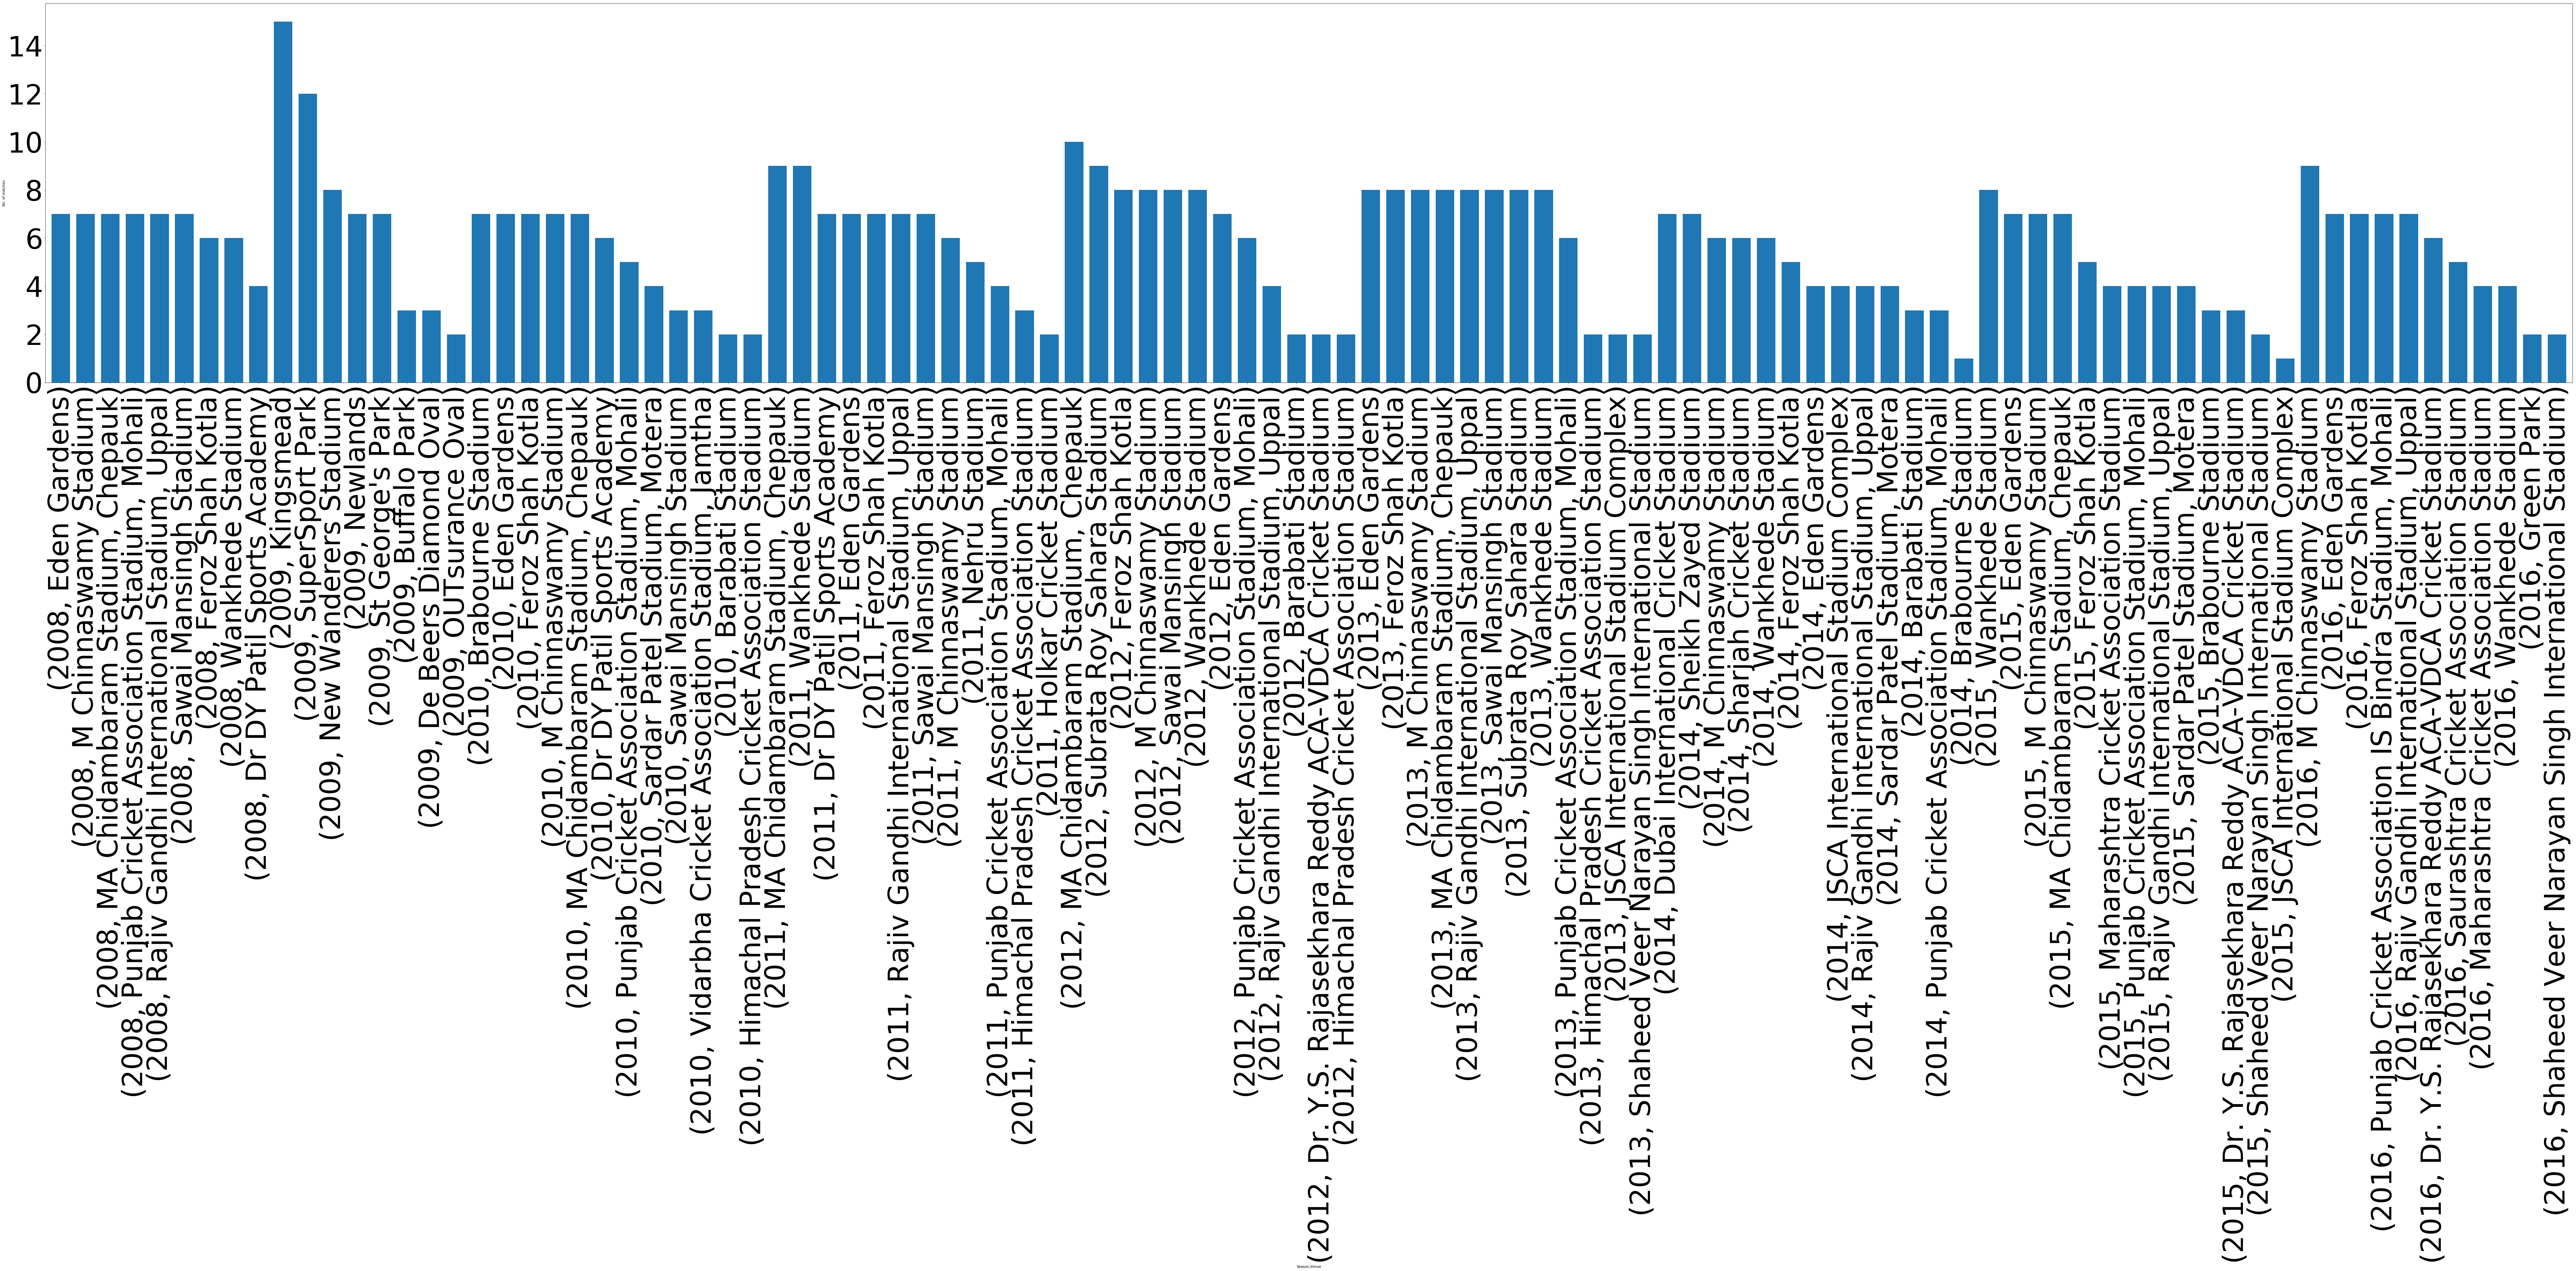

In [5]:
all_groups = matches.groupby(['season'])['venue'].value_counts()
all_groups.plot(kind = 'bar', 
                width = 0.75,
                figsize = (10,20), 
                fontsize = 80)
plt.ylabel("No. of matches")
plt.xlabel("Season,Venue")
plt.show()

## plots season by season

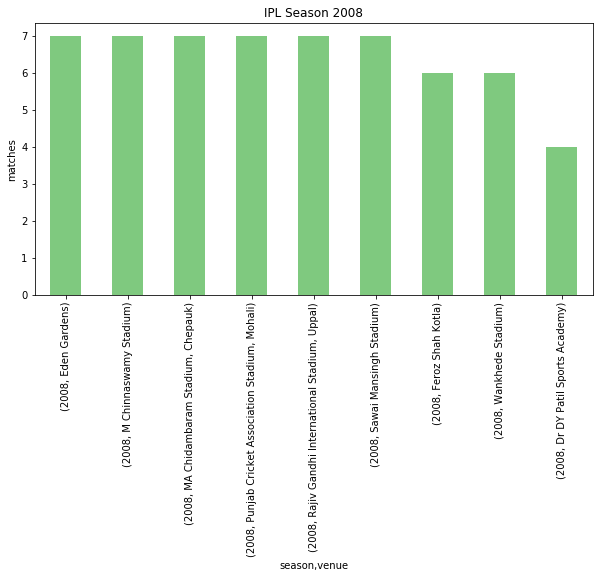

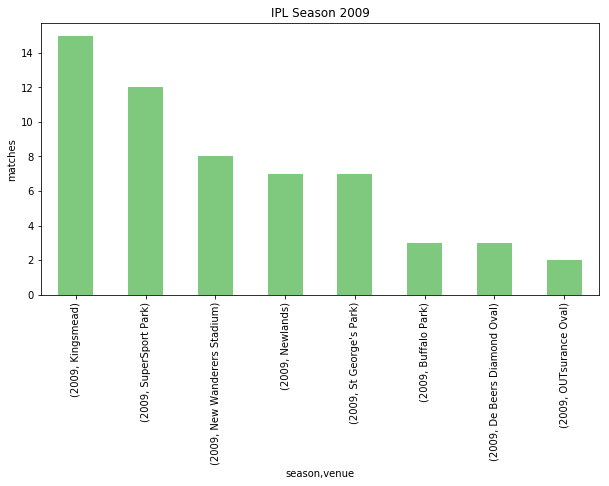

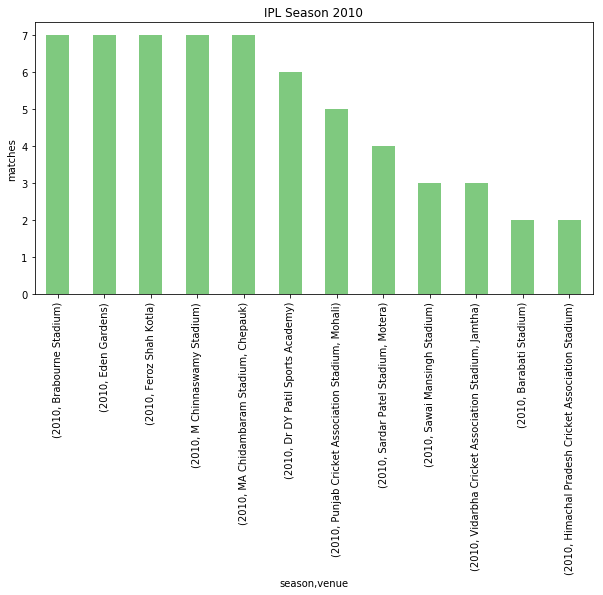

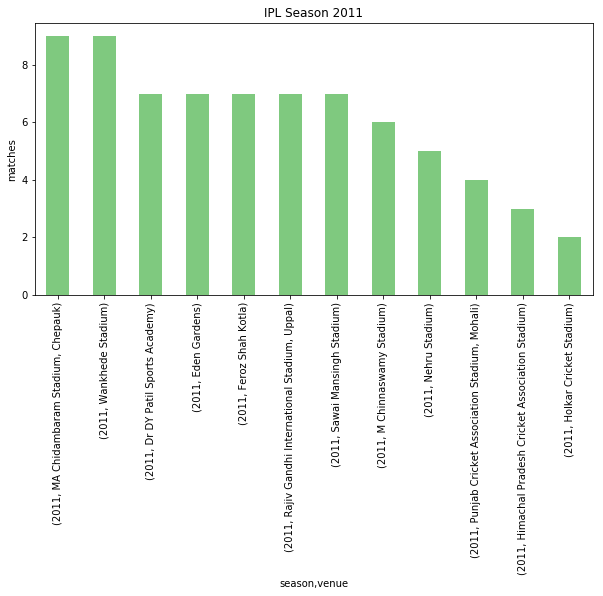

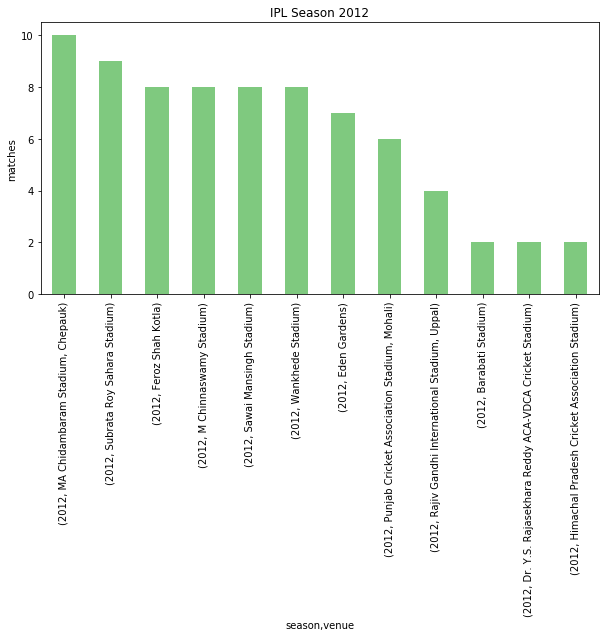

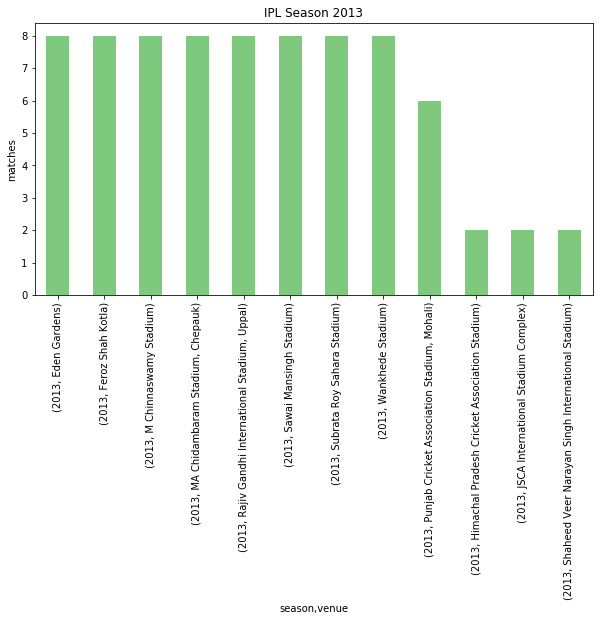

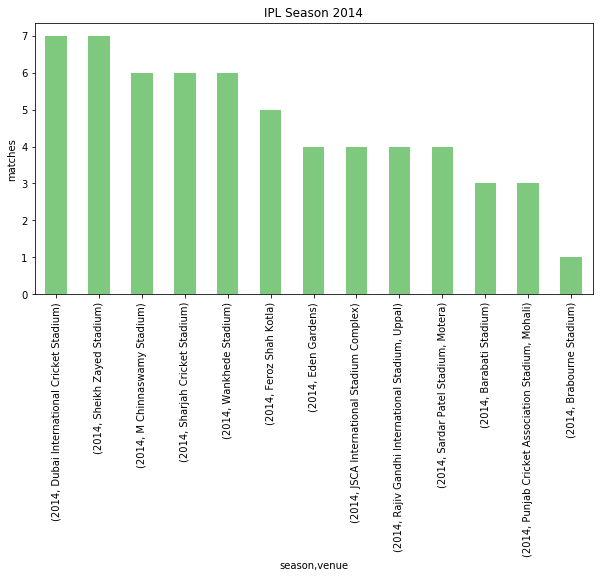

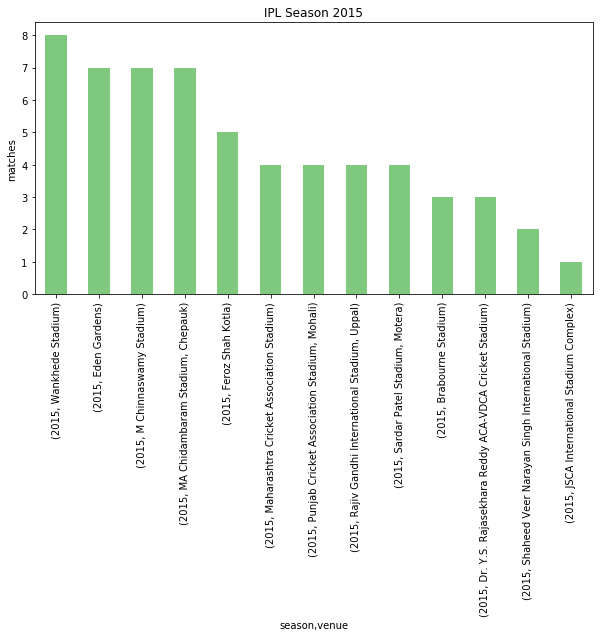

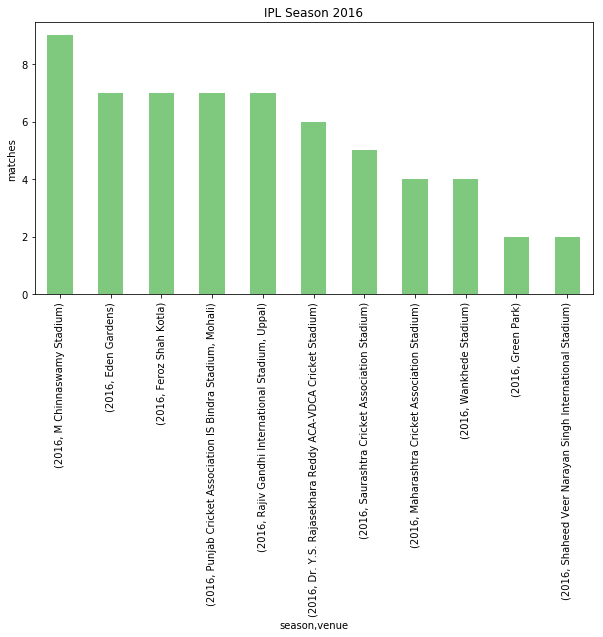

In [4]:
for s in range(2008,2017):
    season = (matches.groupby(['season']).get_group(s)).groupby(['season'])['venue'].value_counts()
    season.plot(kind = 'bar',
                width = 0.5,
                figsize = (10,5), 
                fontsize = 10,
                colormap = cm.Accent)
    title = "IPL Season " + str(s)
    plt.title(title)
    plt.ylabel("matches")
    plt.show()

## Filtering match by id

In [5]:
id_df = matches.loc[(matches['id'] >= 500) & (matches['id'] < 550),:]

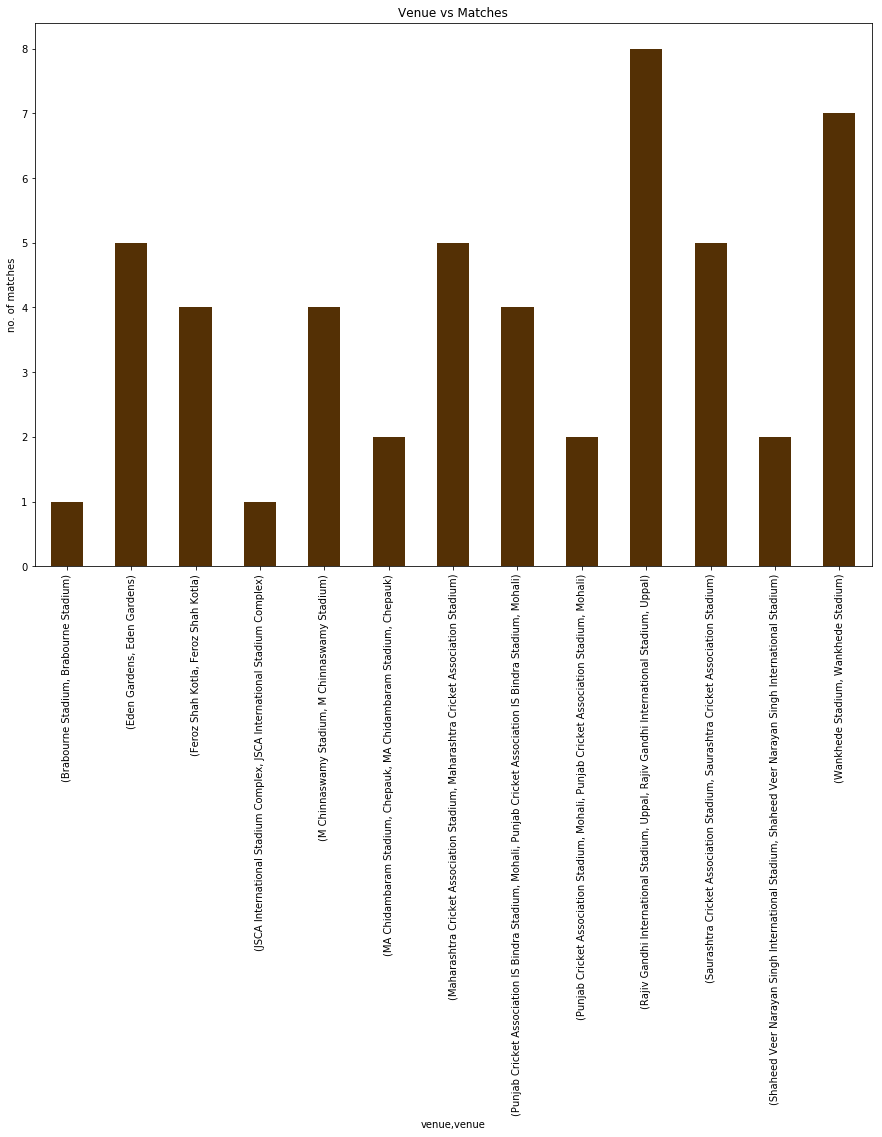

In [6]:
id_df = (id_df.groupby(['venue'])['venue'].value_counts()).fillna(0)
id_df.plot(title = "Venue vs Matches",
           kind = "bar",width = 0.5,
           figsize = (15,10),
           fontsize = 10,
           colormap = cm.BrBG)
plt.ylabel("no. of matches")
plt.show()

## Merging dataframes & plotting aggregate score/match (stacked with innings)

In [7]:
deliveries = pd.read_csv("deliveries.csv")

Merging two dataframes on basis of 'id'

In [8]:
result = pd.merge(matches, deliveries, on = 'id')

In [9]:
result_grouped = result.groupby(['venue','inning'])['total_runs'].sum()
result_grouped = result_grouped.unstack().divide((matches['venue'].value_counts()), axis = 0)
result_grouped = result_grouped.fillna(0)

In [12]:
result_grouped.plot(kind = 'bar', stacked = True, figsize = (15,12))

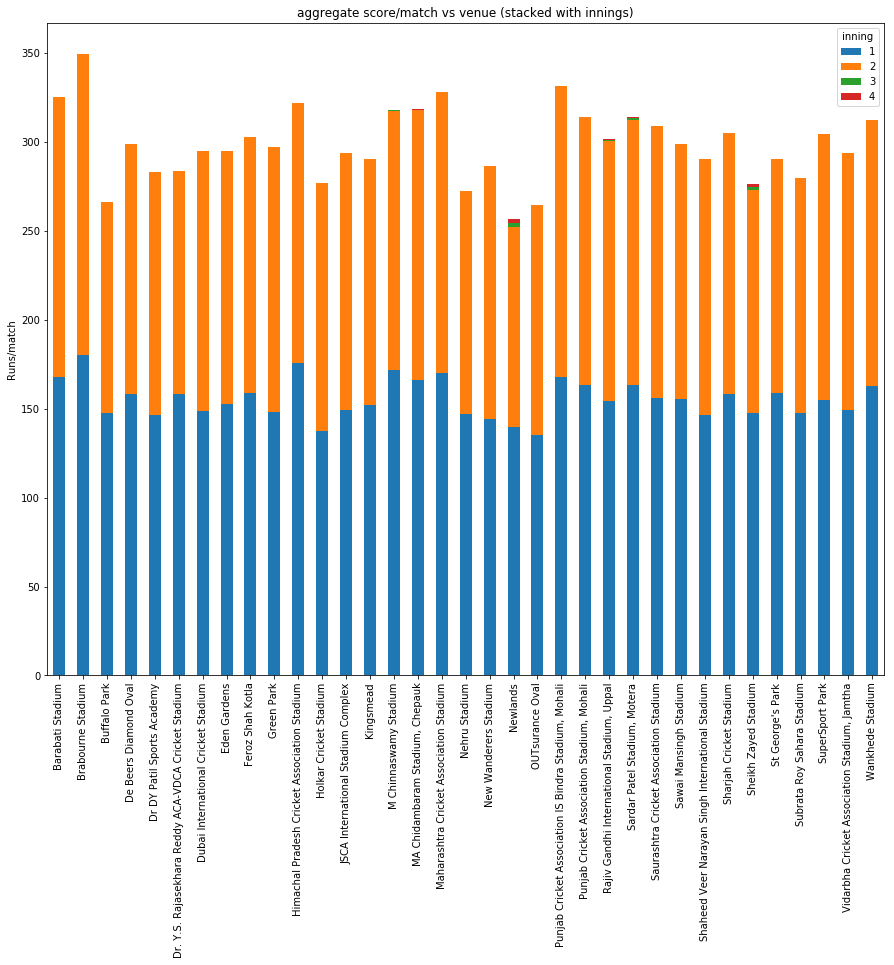

In [13]:
plt.ylabel("Runs/match")
plt.title("aggregate score/match vs venue (stacked with innings)")
plt.show()